## Visualization
To get an understanding of what is in a data set, it's often useful to plot the data. Pandas has multiple build-in function for making figures. To show these figures in the Jupyter notebook we'll make use of the `matplotlib` library, which we'll discuss in detail in the coming lectures.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

trees_df = pd.read_csv('Bomen_in_beheer_door_gemeente_Delft.csv')

The plot functions require numerical data. Each tree in our data set has a numerical value for `AANLEGJAAR`. We'll show the distribution of the planting years by making a histogram of the `AANLEGJAAR` property. We'll focus on the last 100 years by making a mask:

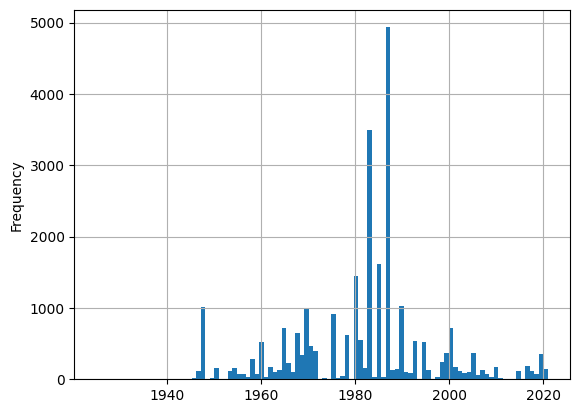

In [37]:
mask = (trees_df['AANLEGJAAR']>=1922) & (trees_df['AANLEGJAAR']< 2022)
h_hist = trees_df['AANLEGJAAR'][mask].plot.hist(bins=100)
plt.grid() # draws grid lines in the plot
plt.show() # draws all figures in wait

Note that the horizontal and vertical axes are labelled automatically. We'll show how to adjust these labels in the chapter on `matplotlib`. 

The geo location (`X` and `Y`) of each tree is also numerical. Plot the locations using the function `plot.scatter`, where `X` is the horizontal position, `Y` is the vertical position, and set the marker size with `s=3`. Assign the scatter plot to the variable `h_scatter`. Also draw the grid lines.

<Figure size 640x480 with 0 Axes>

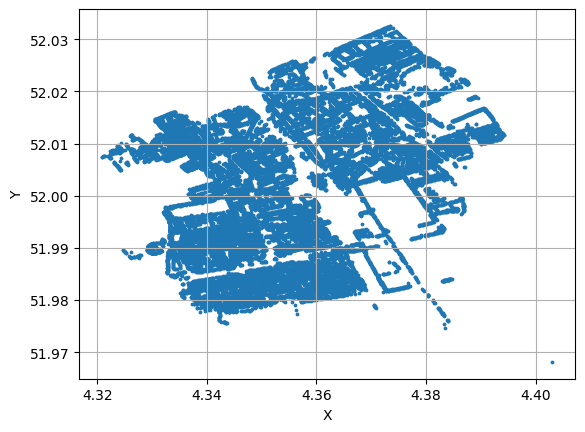

In [71]:
%%assignment
#YOUR CODE HERE
h_fig = plt.figure()
h_scatter = trees_df.plot.scatter(x='X',y='Y',s=3)
plt.grid()
plt.show()

In [46]:
%%check
h_scatter.get_xlim()[1] == 4.407205096485525
h_scatter.get_ylim()[0] == 51.96492056433927


Correct!


Let's color the different neighborhoods in the above plot by using the data in column `WIJK`. For this we set the following additional options in `scatter`:
- `c=trees_df['WIJK'].factorize()[0]`, the option `c` indicates the color of each point, and `factorize` converts a categorical data set to numbers. 
- `colormap='viridis'`, this option changes which colors to use in the plot.

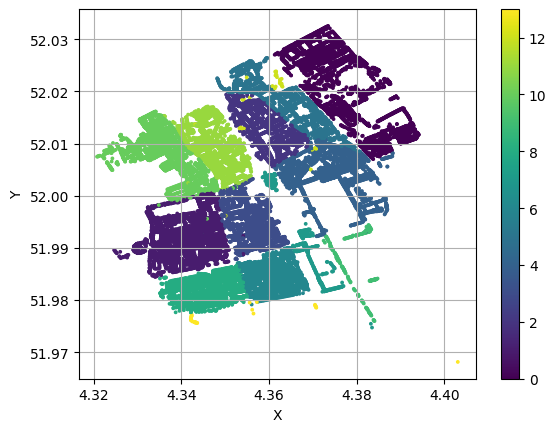

In [59]:
%%assignment
h_scatter = trees_df.plot.scatter(x='X',y='Y',s=3,c=trees_df['WIJK'].factorize()[0],colormap='viridis')
plt.grid()
plt.show()

In [86]:
%%check
h_scatter.get_xlim()[1] == 4.407205096485525
h_scatter.get_ylim()[0] == 51.96492056433927

Correct!


Most columns of the DataFrame only have a few different values or categories. We can show the distribution of the trees over these value using the function `value_counts`, which returns a DataFrame with the number of occurrences of each value in a column. Let's try it for the distribution of tree height:

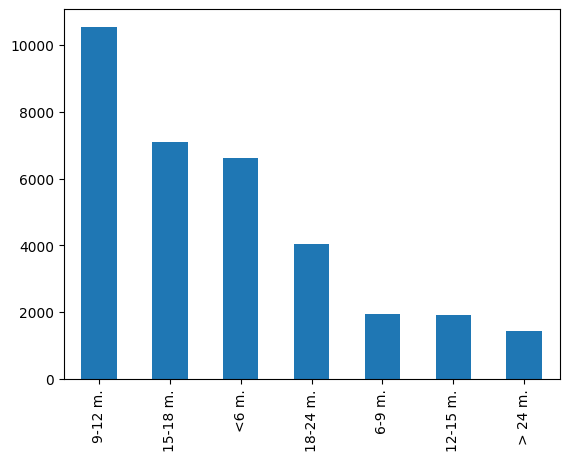

In [95]:
HOOGTE_verdeling = trees_df.HOOGTE.value_counts()
HOOGTE_verdeling.plot(kind='bar')
plt.show()

The bars are ordered by height in the graph, but we can also specify the order of the bars:

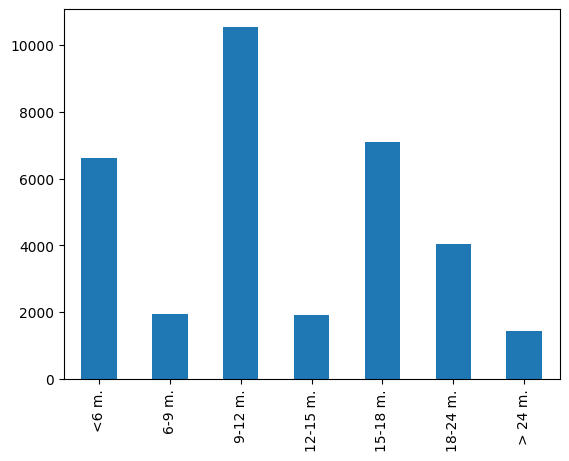

In [96]:
HOOGTE_verdeling = trees_df.HOOGTE.value_counts()
HOOGTE_verdeling[['<6 m.','6-9 m.','9-12 m.','12-15 m.','15-18 m.','18-24 m.', '> 24 m.']].plot(kind='bar')
plt.show()


Instead of a bar chart, we can also make a pie chart to show the distribution of the trees over different categories. Use the function `plot.pie` to show the distribution of the trees of the property `STANDPLAATS`.

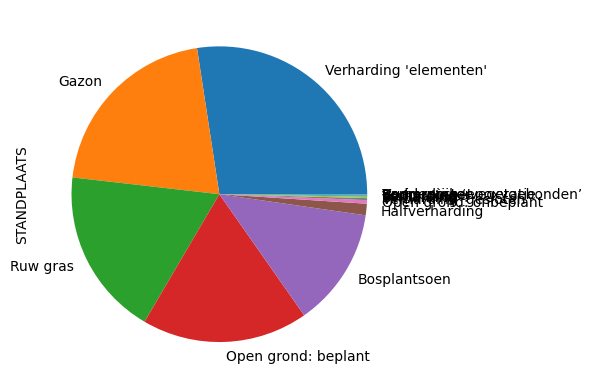

In [123]:
%%assignment
## YOUR CODE HERE
trees_df.STANDPLAATS.value_counts().plot.pie()
plt.show()

In [125]:
%%check
hashresult == 3751981041

Correct!


The above figures can be improved, but we'll have a more in depth discussion on making plots in the section on the `matplotlib` library.